In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [26]:
data = pd.read_csv("bmi_500.csv", index_col = "Label")
data.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [27]:
data.info() #결측치, 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [28]:
data.index.unique() #중복 제거 한 데이터 확인

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

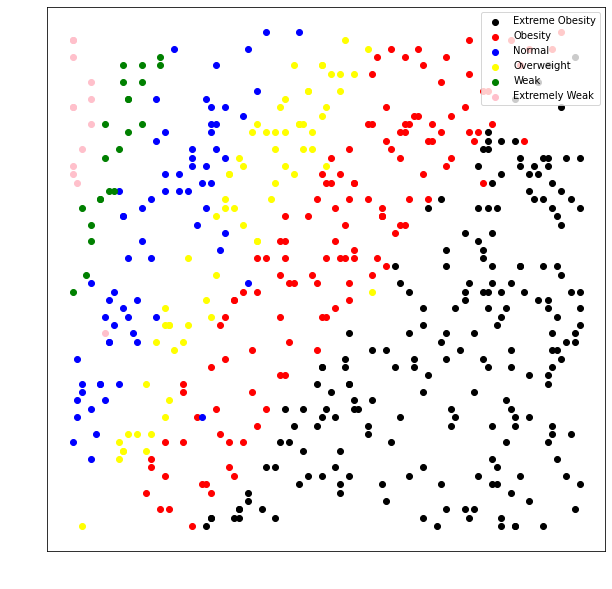

In [29]:
#bmi수치를 시각화하여 표현
def drawScatter(label,color):
    data_scatter = data.loc[label,:]
    plt.scatter(data_scatter['Weight'],# X축 데이터
                data_scatter['Height'],#y축 데이터
                c=color,
                label = label )
              
plt.figure(figsize = (10,10))#그래프 크기
drawScatter('Extreme Obesity','black')
drawScatter('Obesity','red')
drawScatter('Normal','blue')
drawScatter('Overweight','yellow')
drawScatter('Weak','green')
drawScatter('Extremely Weak','pink')

plt.legend(loc='upper right')
plt.tick_params(axis = 'x', labelcolor = 'w',color='w')
plt.tick_params(axis = 'y', labelcolor = 'w',color='w')
plt.xlabel('Weight',color='w') # X축 이름 : Weight
plt.ylabel('Height',color='w') # y축 이름 : Height
plt.show()

In [30]:
#정확도 테스트
data=pd.read_csv('bmi_500.csv')
data.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [11]:
X = data.loc[:,'Height':'Weight'] # X는 문제 : 'Height'와 'Weight' 칼럼
y = data.loc[:,"Label"] # y는 정답 'Label' 칼럼

In [12]:
# 훈련 70 / 평가 30으로 데이터를 나눈다.
X_train = X.iloc[:350,:]
X_test = X.iloc[350:,:]
y_train = y.iloc[:350,]
y_test = y.iloc[350:]

In [13]:
knn=KNeighborsClassifier(n_neighbors=7) # 이웃의 수는 7로 했다.

In [14]:
#학습
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
#평가 및 정확도
print('train score:',knn.score(X_train,y_train))
print('test score:',knn.score(X_test,y_test))

train score: 0.9
test score: 0.9


In [16]:
X_train

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
345,184,106
346,191,68
347,162,58
348,178,138


In [18]:
y_train

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
345            Obesity
346             Normal
347             Normal
348    Extreme Obesity
349             Normal
Name: Label, Length: 350, dtype: object

In [19]:
# 모델로 이웃 수 1 ~ 100까지 하이퍼파라미터를 해서 그래프로 시각화
train_list = []
for k in range(1,101):
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(X_train,y_train)
  train_list.append(model.score(X_train,y_train))

In [20]:
train_list

[1.0,
 0.9485714285714286,
 0.9342857142857143,
 0.9514285714285714,
 0.9257142857142857,
 0.9057142857142857,
 0.9,
 0.9057142857142857,
 0.9057142857142857,
 0.9085714285714286,
 0.9085714285714286,
 0.9114285714285715,
 0.9114285714285715,
 0.8971428571428571,
 0.8942857142857142,
 0.8942857142857142,
 0.9,
 0.88,
 0.8885714285714286,
 0.8771428571428571,
 0.8685714285714285,
 0.8485714285714285,
 0.8685714285714285,
 0.86,
 0.8628571428571429,
 0.8457142857142858,
 0.8514285714285714,
 0.8342857142857143,
 0.8371428571428572,
 0.8257142857142857,
 0.84,
 0.8314285714285714,
 0.8371428571428572,
 0.8285714285714286,
 0.8171428571428572,
 0.8171428571428572,
 0.8142857142857143,
 0.8171428571428572,
 0.8171428571428572,
 0.8114285714285714,
 0.8028571428571428,
 0.8028571428571428,
 0.8,
 0.8057142857142857,
 0.7885714285714286,
 0.7885714285714286,
 0.7885714285714286,
 0.7828571428571428,
 0.7857142857142857,
 0.7828571428571428,
 0.78,
 0.78,
 0.7771428571428571,
 0.78,
 0.7771428

In [21]:
test_list = []
for k in range(1,101):
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(X_train,y_train)
  test_list.append(model.score(X_test,y_test))

In [22]:
test_list

[0.8933333333333333,
 0.8933333333333333,
 0.8933333333333333,
 0.8933333333333333,
 0.9066666666666666,
 0.92,
 0.9,
 0.9133333333333333,
 0.92,
 0.9266666666666666,
 0.8866666666666667,
 0.9133333333333333,
 0.9,
 0.8866666666666667,
 0.8933333333333333,
 0.8933333333333333,
 0.8933333333333333,
 0.8933333333333333,
 0.86,
 0.8666666666666667,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.8466666666666667,
 0.8466666666666667,
 0.8466666666666667,
 0.8533333333333334,
 0.8466666666666667,
 0.84,
 0.8333333333333334,
 0.84,
 0.84,
 0.8333333333333334,
 0.8333333333333334,
 0.84,
 0.84,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.82,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8133333333333334,
 0.8066666666666666,
 0.8066666666666666,
 0.8066666666666666,
 0.8066666666666666,
 0.8066666666666666,
 0.8133333333333334,
 0.8066666666666666,
 0.8133333333333334,
 0.7866666666666666,
 0.7933333333333333,
 0.7866666666666666,
 

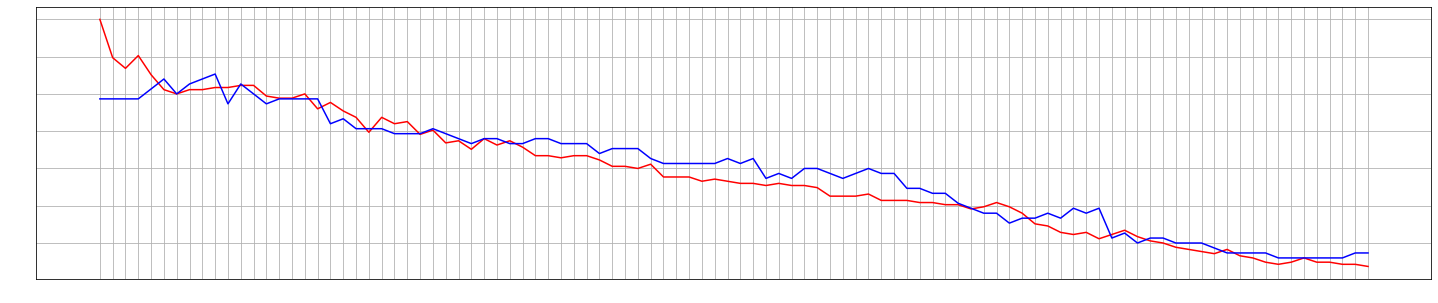

In [23]:
plt.figure(figsize = (25,5))
plt.plot(range(1,101),
         train_list,
         c = 'red')
plt.plot(range(1,101),
         test_list,
         c = 'blue')
plt.xticks(range(1,101))
plt.tick_params(axis = 'x', labelcolor = 'w', color = 'w')
plt.tick_params(axis = 'y', labelcolor = 'w', color = 'w')
plt.grid()
plt.show()